In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data=pd.read_csv('Data.csv')

# Data Inspection

In [3]:
# settings to display all columns
pd.set_option("display.max_columns", None)
# Glimpse of dataset
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [5]:
data.shape

(25000, 24)

In [6]:
# Number of columns = 24
# Number of rows = 25000
# Number of categorical columns = 8
# Number of numerical columns = 16
# Target variable = 'product_wg_ton'
# Target variable type = Continuous

In [7]:
# Checking the dataset for duplicate entries
data.duplicated().sum()

0

In [8]:
# No duplicate records found in dataset

# Univariate Analysis

## Independent Variables (Categorical)

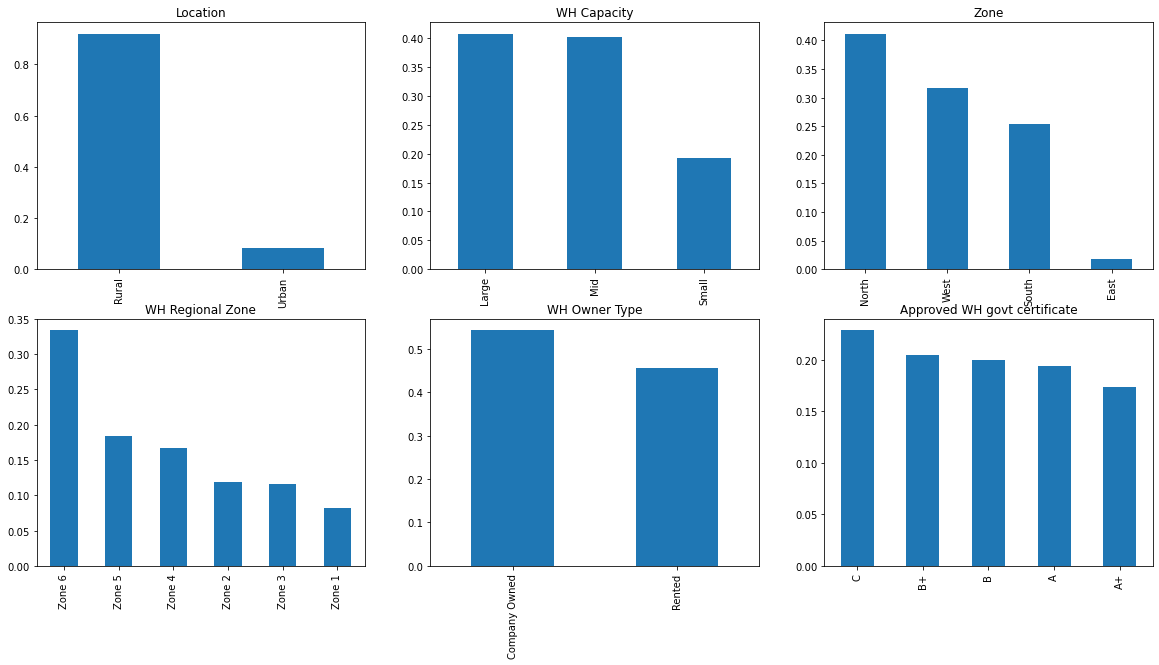

In [9]:
plt.figure(1)
plt.subplot(231)
data['Location_type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Location')
plt.subplot(232)
data['WH_capacity_size'].value_counts(normalize=True).plot.bar(title='WH Capacity')
plt.subplot(233)
data['zone'].value_counts(normalize=True).plot.bar(title='Zone')
plt.subplot(234)
data['WH_regional_zone'].value_counts(normalize=True).plot.bar(title='WH Regional Zone')
plt.subplot(235)
data['wh_owner_type'].value_counts(normalize=True).plot.bar(title='WH Owner Type')
plt.subplot(236)
data['approved_wh_govt_certificate'].value_counts(normalize=True).plot.bar(title='Approved WH govt certificate')
plt.show()

It can be inferred from the above bar plots that:
* More than 90% warehouses are located in rural area
* Most of the warehouses are mid and large. About 20% warehouses are small.
* North has maximum number of warehouses and East has very low number of warehouses.
* About 34% of warehouses are located in Zone 6
* About 55% of warehouses are company-owned rest are rented
* Only around 17% warehouses are having A+ govt. certificate. 

## Independent Variables (Nominal)

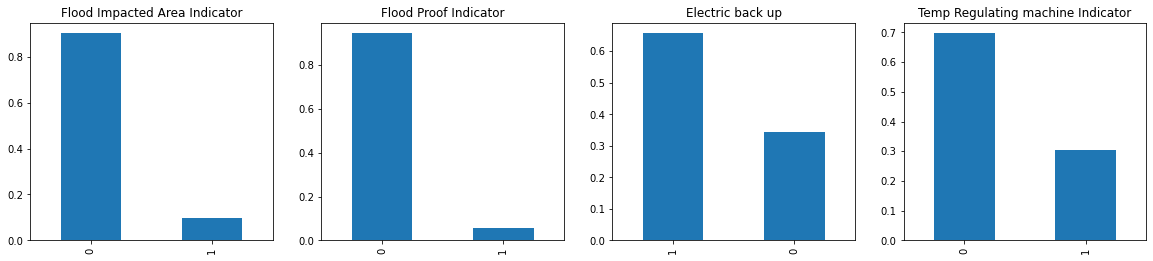

In [10]:
plt.figure(1)
plt.subplot(141)
data['flood_impacted'].value_counts(normalize=True).plot.bar(figsize=(20,4),title='Flood Impacted Area Indicator')
plt.subplot(142)
data['flood_proof'].value_counts(normalize=True).plot.bar(title='Flood Proof Indicator')
plt.subplot(143)
data['electric_supply'].value_counts(normalize=True).plot.bar(title='Electric back up')
plt.subplot(144)
data['temp_reg_mach'].value_counts(normalize=True).plot.bar(title='Temp Regulating machine Indicator')
plt.show()

Following inferences can be made from the above bar plots:
* Warehouses impacted by flood are very less and therefore most of the warehouses are not floodproof.
* About 65% are having electric backup
* Around 70% warehouses are functioning without temp regulating machine

## Independent Variable (Numerical)

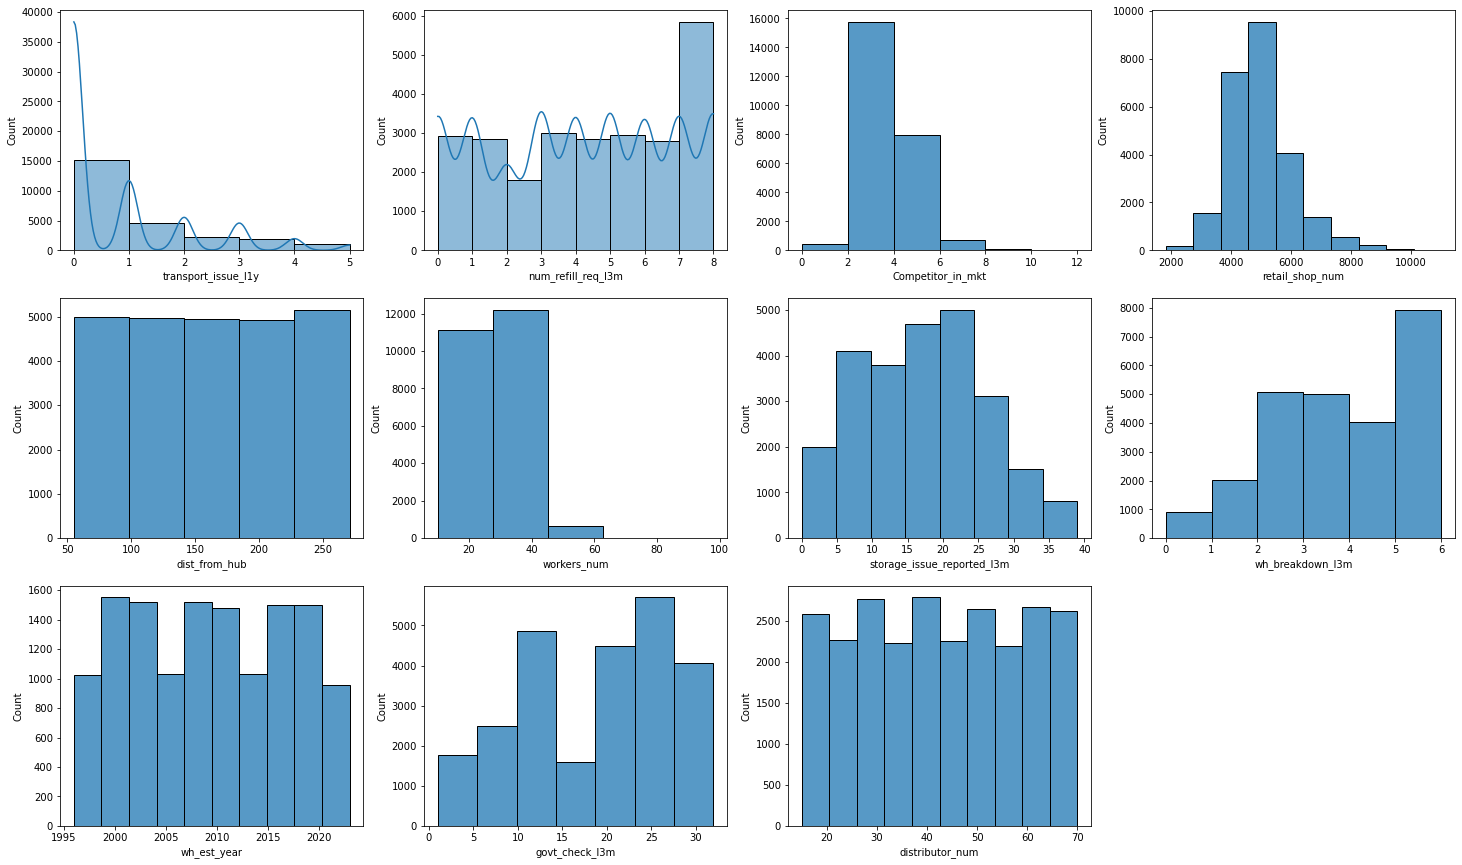

In [11]:
plt.figure(figsize=(25,15)) 
plt.subplot(341) 
sns.histplot(data['transport_issue_l1y'],bins=5,kde=True) 
plt.subplot(342) 
sns.histplot(x='num_refill_req_l3m',data=data,bins=8,kde=True)
plt.subplot(343) 
sns.histplot(x='Competitor_in_mkt',data=data,bins=6)
plt.subplot(344) 
sns.histplot(x='retail_shop_num',data=data,bins=10)
plt.subplot(345) 
sns.histplot(x='dist_from_hub',data=data,bins=5)
plt.subplot(346) 
sns.histplot(x='workers_num',data=data,bins=5)
plt.subplot(347) 
sns.histplot(x='storage_issue_reported_l3m',data=data,bins=8)
plt.subplot(348) 
sns.histplot(x='wh_breakdown_l3m',data=data,bins=6)
plt.subplot(349) 
sns.histplot(x='wh_est_year',data=data,bins=10)
plt.subplot(3,4,10) 
sns.histplot(x='govt_check_l3m',data=data,bins=7)
plt.subplot(3,4,11) 
sns.histplot(x='distributor_num',data=data,bins=10)
plt.show()

* Transport issue reported are less
* Most warehouses had 8 refills in last 3 months
* There are 2-3 competitoers in market
* There are mostly 4000-5000 retail shops who sell the product within the warehouse area
* Distance from hub, number of distributors are fairly uniform across ranges.
* Majority of warehouses have 30-40 workers 
* Majority of warehouses having less than 20 issues across the duration of 3 months.
* The installation of warehouses seems to be fairly uniform.
* The number of government checks have been 25 to 30 for most warehouses.
#### There is skewness observed in few features. The data is not normally distributed. 

## Target Variable

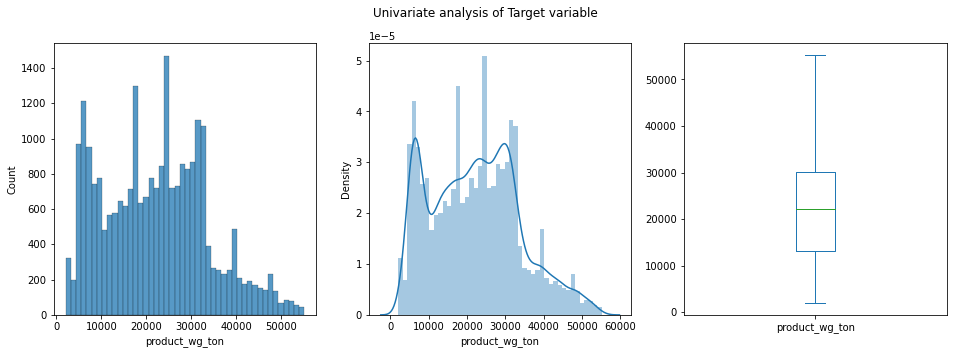

In [12]:
plt.figure(1) 
plt.subplot(131) 
sns.histplot(x='product_wg_ton',data=data)
plt.subplot(132)
sns.distplot(data['product_wg_ton'])
plt.subplot(133)
data['product_wg_ton'].plot.box(figsize=(16,5))
plt.suptitle('Univariate analysis of Target variable')
plt.show()

# Bivariate plots

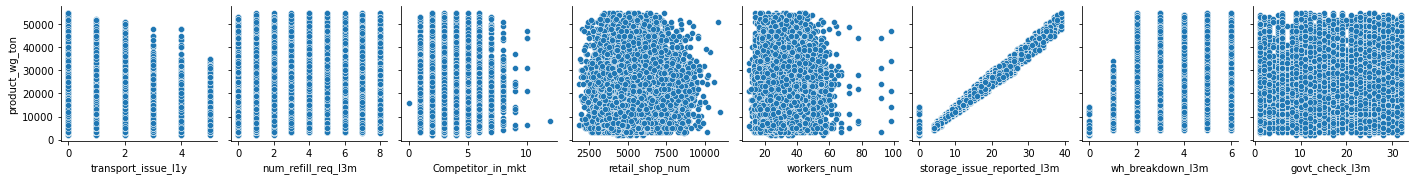

In [13]:
sns.pairplot(x_vars=['transport_issue_l1y', 'num_refill_req_l3m','Competitor_in_mkt', 'retail_shop_num', 'workers_num',
'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m'],y_vars=['product_wg_ton'],data=data)

# Multivariate Analysis

<AxesSubplot:xlabel='zone', ylabel='transport_issue_l1y'>

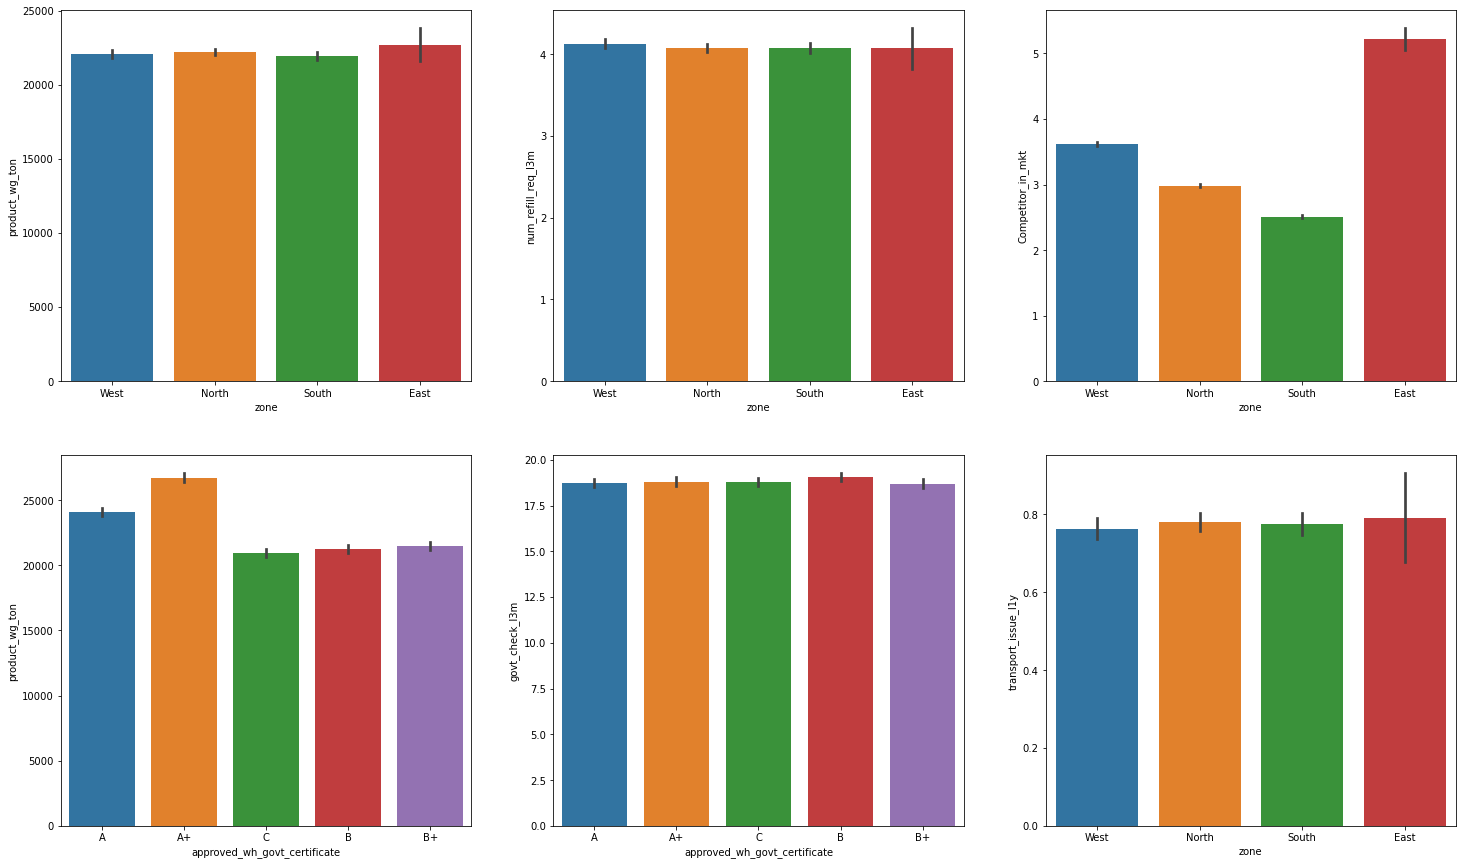

In [14]:
plt.figure(figsize=(25,15)) 
plt.subplot(231) 
sns.barplot(x='zone',y='product_wg_ton',data=data)
plt.subplot(232) 
sns.barplot(x='zone',y='num_refill_req_l3m',data=data)
plt.subplot(233) 
sns.barplot(x='zone',y='Competitor_in_mkt',data=data)
plt.subplot(234) 
sns.barplot(x='approved_wh_govt_certificate',y='product_wg_ton',data=data)
plt.subplot(235) 
sns.barplot(x='approved_wh_govt_certificate',y='govt_check_l3m',data=data)
plt.subplot(236) 
sns.barplot(x='zone',y='transport_issue_l1y',data=data)


* All zones have equal product demand
* East zone has maximum number of competitors in market
* The warehouses with A+ certifications have on average greater demand for products.


In [15]:
data.groupby(['zone','WH_regional_zone']).product_wg_ton.sum()

zone   WH_regional_zone
East   Zone 1                 872338
       Zone 3                2526684
       Zone 4                3306171
       Zone 5                1768074
       Zone 6                1274236
North  Zone 1               18466131
       Zone 2               18966332
       Zone 3               21335735
       Zone 4               26254519
       Zone 5               42893115
       Zone 6              100249991
South  Zone 1               14682866
       Zone 2               32467899
       Zone 3               18810119
       Zone 4               19230670
       Zone 5               24113697
       Zone 6               30235650
West   Zone 1               10638197
       Zone 2               15146537
       Zone 3               20617692
       Zone 4               43804669
       Zone 5               32242727
       Zone 6               52661774
Name: product_wg_ton, dtype: int64

* In east zone, there are no warehouses in zone 2.
* In north region, zone 6 has maximum product demand.

In [16]:
data.groupby(['wh_owner_type','zone']).transport_issue_l1y.sum()

wh_owner_type  zone 
Company Owned  East      175
               North    4364
               South    2627
               West     3285
Rented         East      164
               North    3664
               South    2301
               West     2762
Name: transport_issue_l1y, dtype: int64

In [17]:
data.groupby('zone').flood_impacted.value_counts()

zone   flood_impacted
East   0                  397
       1                   32
North  0                 9226
       1                 1052
South  0                 5741
       1                  621
West   0                 7182
       1                  749
Name: flood_impacted, dtype: int64

In [18]:
data.groupby('zone').flood_proof.value_counts()

zone   flood_proof
East   0               404
       1                25
North  0              9737
       1               541
South  0              6009
       1               353
West   0              7484
       1               447
Name: flood_proof, dtype: int64

# Data Pre-processing

### Missing Value Treatment

In [19]:
data.isna().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [20]:
# Percentage of missing values in each column
(data.isna().sum()/len(data))*100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [21]:
# Removing two independent variable columns 'Ware_house_ID' and 'WH_Manager_ID' as these are ID columns and have no in the machine learning algorithm
data=data.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)

In [22]:
# Identifying Categorical features
categorical_features=data.select_dtypes(include=['object'])

# Creating dummy variables
cat_dummies = pd.get_dummies(categorical_features, drop_first=True)
cat_dummies.head()

,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [23]:
data = data.drop(categorical_features, axis=1)
data = pd.concat([data, cat_dummies], axis=1)
data.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,NaN,13,0,5,15,17115,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,NaN,4,0,3,17,5074,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,NaN,17,0,6,22,23137,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,NaN,17,1,3,27,22115,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


# Normalizing data for KNN Imputation

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
df_scaled.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,0.375,0.2,0.166667,0.308044,0.163636,0.0,1.0,1.0,0.166667,0.215909,NaN,0.333333,0.0,0.833333,0.451613,0.283502,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.000,0.0,0.333333,0.478502,0.581818,0.0,0.0,1.0,0.717593,0.238636,NaN,0.102564,0.0,0.500000,0.516129,0.056682,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.125,0.0,0.333333,0.270491,0.890909,0.0,0.0,0.0,0.490741,0.306818,NaN,0.435897,0.0,1.000000,0.677419,0.396941,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.875,0.8,0.166667,0.454882,0.636364,0.0,0.0,0.0,0.222222,0.125000,NaN,0.435897,1.0,0.500000,0.838710,0.377689,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.375,0.2,0.166667,0.317732,0.490909,1.0,0.0,1.0,0.263889,0.170455,0.481481,0.461538,0.0,1.000000,0.741935,0.414535,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Imputing missing values using KNN imputer

In [25]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()
imputed = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(imputed, columns=df_scaled.columns)

In [26]:
df_imputed.isna().sum()

num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                        0
storage_issue_reported_l3m         0
temp_reg_mach                      0
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
Location_type_Urban                0
WH_capacity_size_Mid               0
WH_capacity_size_Small             0
zone_North                         0
zone_South                         0
zone_West                          0
WH_regional_zone_Zone 2            0
WH_regional_zone_Zone 3            0
WH_regional_zone_Zone 4            0
WH_regional_zone_Zone 5            0
WH_regional_zone_Zone 6            0
w

In [27]:
scaleback=scaler.inverse_transform(df_imputed)
df_scaleback=pd.DataFrame(scaleback,columns=df_scaled.columns)
df_scaleback

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3.0,1.0,2.0,4651.0,24.0,0.0,1.0,1.0,91.0,29.0,2010.6,13.0,0.0,5.0,15.0,17115.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,4.0,6217.0,47.0,0.0,0.0,1.0,210.0,31.0,2018.8,4.0,0.0,3.0,17.0,5074.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,4.0,4306.0,64.0,0.0,0.0,0.0,161.0,37.0,2002.6,17.0,0.0,6.0,22.0,23137.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,4.0,2.0,6000.0,50.0,0.0,0.0,0.0,103.0,21.0,2010.8,17.0,1.0,3.0,27.0,22115.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,3.0,1.0,2.0,4740.0,42.0,1.0,0.0,1.0,112.0,25.0,2009.0,18.0,0.0,6.0,24.0,24071.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3.0,0.0,4.0,5390.0,19.0,0.0,0.0,1.0,142.0,34.0,2005.0,22.0,1.0,2.0,30.0,32093.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24996,6.0,0.0,4.0,4490.0,57.0,0.0,0.0,1.0,130.0,28.0,2012.0,10.0,0.0,4.0,18.0,12114.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24997,7.0,0.0,2.0,5403.0,31.0,1.0,0.0,1.0,147.0,31.2,2002.4,23.0,0.0,5.0,25.0,27080.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
24998,1.0,0.0,2.0,10562.0,25.0,0.0,0.0,1.0,60.0,25.0,2009.0,18.0,0.0,6.0,30.0,25093.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
# Converting 'wh_est_year' into 'wh_age' to extract more meaningful insight. 
df_scaleback['wh_est_year']=df_scaleback['wh_est_year'].astype('int64')
df_scaleback['wh_age']=2023-df_scaleback['wh_est_year']
df_scaleback.drop('wh_est_year',axis=1,inplace=True)

# Outlier Identification and Treatment

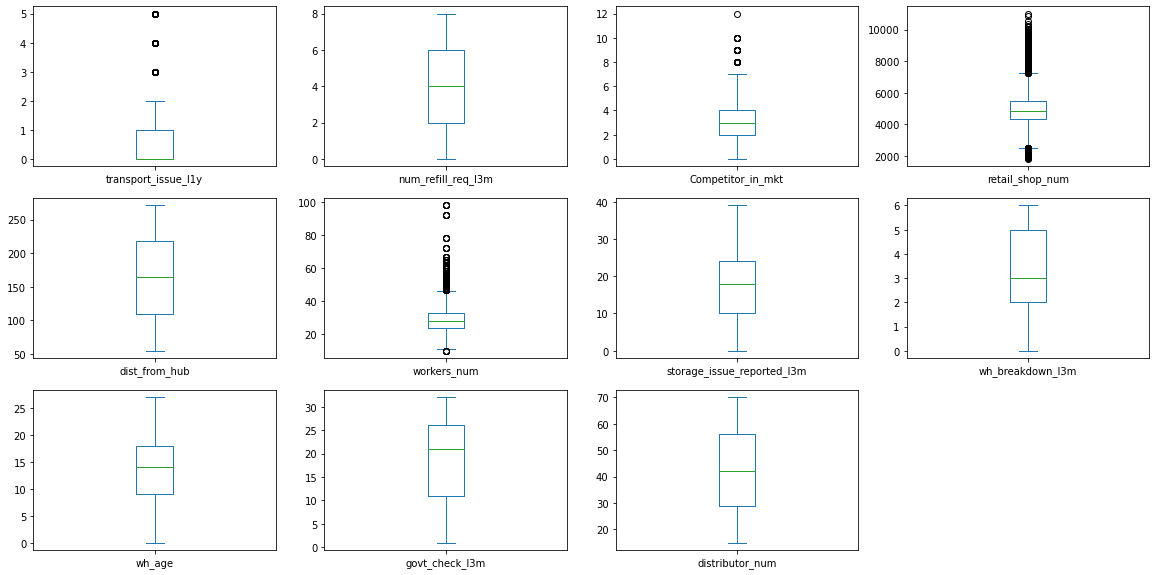

In [29]:
plt.figure(1) 
plt.subplot(341)
df_scaleback['transport_issue_l1y'].plot.box(figsize=(20,10)) 
plt.subplot(342)
df_scaleback['num_refill_req_l3m'].plot.box() 
plt.subplot(343)
df_scaleback['Competitor_in_mkt'].plot.box() 
plt.subplot(344)
df_scaleback['retail_shop_num'].plot.box() 
plt.subplot(345)
df_scaleback['dist_from_hub'].plot.box() 
plt.subplot(346)
df_scaleback['workers_num'].plot.box() 
plt.subplot(347)
df_scaleback['storage_issue_reported_l3m'].plot.box() 
plt.subplot(348)
df_scaleback['wh_breakdown_l3m'].plot.box() 
plt.subplot(349)
df_scaleback['wh_age'].plot.box() 
plt.subplot(3,4,10)
df_scaleback['govt_check_l3m'].plot.box() 
plt.subplot(3,4,11)
df_scaleback['distributor_num'].plot.box() 


plt.show()

In [30]:
# There are outliers in transport_issue_l1y, Competitor_in_mkt, retail_shop_num and workers_num
# Replacing outliers with upper and lower boundary using Inter Quantile Range(IQR) method.

In [31]:
# Splitting the data into train test split and then applying outlier treatment as we want to keep test dataset untouched

In [32]:
# Dividing the data into x and y
y=df_scaleback['product_wg_ton']
x=df_scaleback.drop(['product_wg_ton'],axis=1)

In [33]:
# Spliting the data into train-test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=101)

In [34]:
x_train_cap = x_train.copy()

In [35]:
outlier_features=['transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num' , 'workers_num']
outlier_features

['transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'workers_num']

In [36]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = x_train[col].quantile(0.25)
        q3 = x_train[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [37]:
iqr_capping(x_train_cap, outlier_features, 1.5)

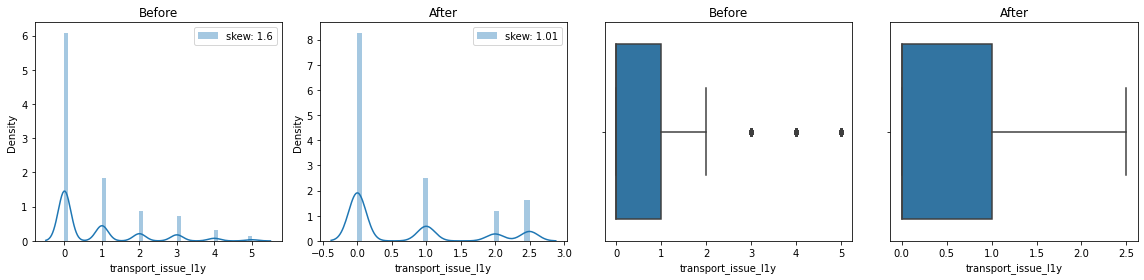

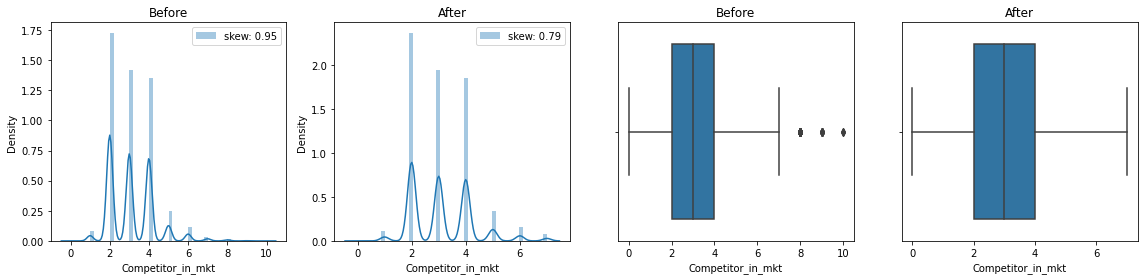

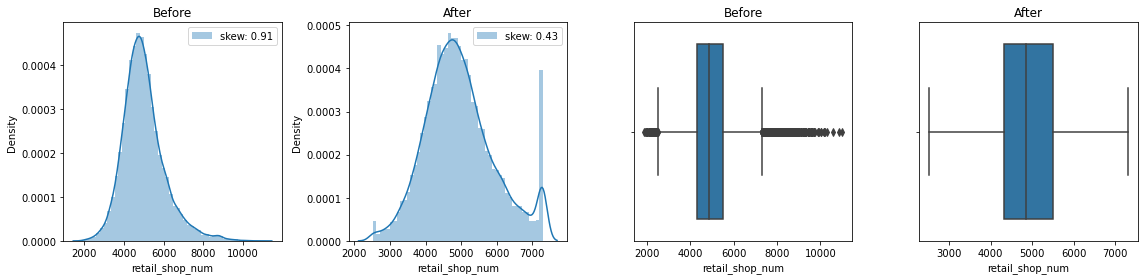

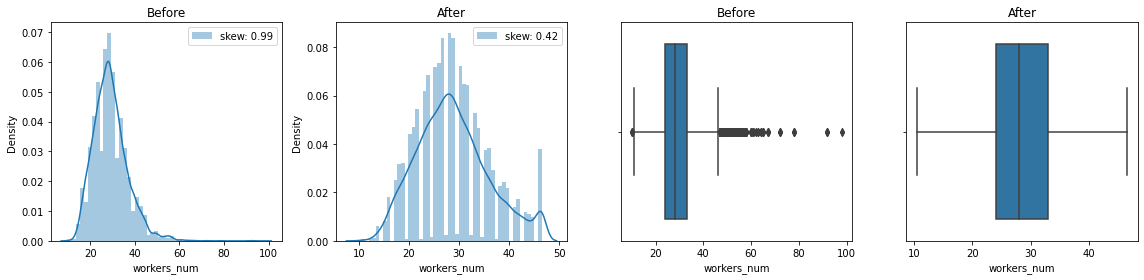

In [38]:
for col in outlier_features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(x_train[col], label="skew: " + str(np.round(x_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(x_train_cap[col], label="skew: " + str(np.round(x_train_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(x_train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(x_train_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [40]:
pd.DataFrame({'variables':x_train_cap.columns[1:], 'VIF':[variance_inflation_factor(x_train_cap.values, i+1) for i in range(len(x_train_cap.columns[1:]))]})

,variables,VIF
0,transport_issue_l1y,1.577217
1,Competitor_in_mkt,9.344466
2,retail_shop_num,24.056959
3,distributor_num,7.749032
4,flood_impacted,1.167992
5,flood_proof,1.079230
6,electric_supply,3.568398
7,dist_from_hub,7.528018
8,workers_num,18.599519
9,storage_issue_reported_l3m,12.665720


In [41]:
# The independent variables 'retail_shop_num','workers_num','storage_issue_reported_l3m','WH_capacity_size_Mid',
# 'zone_North', 'zone_South', 'zone_West','WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3',
# 'WH_regional_zone_Zone 4' (VIF > 10) are  correlated with some independent variables in the model.

In [42]:
# Running a correlation analysis to know which variables are highly correlated.
pd.set_option("display.max_columns", None)
x_train_cap.corr()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,wh_age
num_refill_req_l3m,1.000000,0.020466,0.001438,0.002998,0.001433,-0.004144,-0.000834,-0.007081,0.000737,-0.010055,-0.011641,0.255969,0.000696,-0.005776,0.014136,0.002379,-0.010301,-0.004641,-0.002019,0.007763,-0.007755,0.006069,0.004633,0.003642,0.003065,0.013152,0.003526,0.008308,0.003729,-0.012681,-0.021954
transport_issue_l1y,0.020466,1.000000,0.000350,-0.007578,0.009711,-0.013775,-0.001540,-0.013355,0.013312,-0.007790,-0.149314,0.017649,0.016773,0.004995,0.010835,-0.004364,0.012761,0.004229,-0.003857,-0.002377,-0.013117,-0.004579,0.009506,-0.002728,0.004443,0.010503,-0.007411,-0.007279,0.012451,0.006255,-0.039937
Competitor_in_mkt,0.001438,0.000350,1.000000,-0.168572,-0.001725,0.012075,-0.004629,0.005624,0.008212,-0.002296,0.010242,0.009779,0.012646,-0.045188,0.010064,-0.000046,0.006673,-0.082337,-0.308809,0.311680,-0.076365,0.016767,0.051536,-0.018987,0.020103,-0.007508,0.000103,-0.002197,-0.002330,0.001103,0.012423
retail_shop_num,0.002998,-0.007578,-0.168572,1.000000,-0.000377,-0.006179,0.008342,-0.012414,0.004864,-0.009775,-0.006954,-0.003765,-0.008189,0.049507,-0.002766,-0.016512,0.069582,0.052228,0.021604,-0.067518,0.019725,-0.059528,0.012129,-0.026392,0.011761,0.006848,-0.007098,0.004215,0.007412,-0.003912,-0.008798
distributor_num,0.001433,0.009711,-0.001725,-0.000377,1.000000,0.003169,0.000819,0.003991,-0.013045,-0.012635,0.002618,0.000425,0.001525,-0.011468,-0.000516,-0.005227,0.005309,0.001712,-0.008921,0.010044,-0.009821,-0.001508,0.002908,0.003960,0.000833,0.011650,0.004696,-0.001967,-0.007459,-0.000778,0.010788
flood_impacted,-0.004144,-0.013775,0.012075,-0.006179,0.003169,1.000000,0.106023,0.164137,0.006047,0.167091,-0.003303,-0.005839,0.000102,-0.005039,0.001395,0.000948,0.011885,0.010597,-0.000450,-0.007082,-0.003915,-0.008829,0.012157,-0.008596,-0.000841,-0.107410,0.007365,-0.009970,-0.001417,0.003726,0.006087
flood_proof,-0.000834,-0.001540,-0.004629,0.008342,0.000819,0.106023,1.000000,0.113287,-0.002753,0.051199,-0.003491,0.008544,-0.008733,-0.008601,0.005873,0.011211,-0.005383,-0.002356,-0.003715,0.005831,-0.002014,0.009988,0.007914,-0.006295,-0.002801,-0.029188,0.005928,-0.012493,-0.003898,0.007397,-0.004829
electric_supply,-0.007081,-0.013355,0.005624,-0.012414,0.003991,0.164137,0.113287,1.000000,-0.001519,0.370766,0.000153,-0.003990,-0.010413,-0.007635,-0.003984,-0.015552,0.001530,0.005550,-0.008878,0.003476,-0.014553,0.001320,-0.008958,0.013738,0.001621,-0.229891,-0.000762,-0.006697,0.007664,-0.000015,0.009249
dist_from_hub,0.000737,0.013312,0.008212,0.004864,-0.013045,0.006047,-0.002753,-0.001519,1.000000,-0.019905,-0.006865,0.003761,-0.001435,-0.000763,-0.006673,0.005358,-0.003083,-0.008801,0.007195,0.003474,-0.001857,-0.001681,0.010063,0.002447,-0.001928,-0.004629,0.009044,-0.003116,-0.003320,-0.011997,-0.007046
workers_num,-0.010055,-0.007790,-0.002296,-0.009775,-0.012635,0.167091,0.051199,0.370766,-0.019905,1.000000,-0.007704,0.005617,-0.018284,-0.007533,-0.001288,-0.020984,0.008649,-0.001979,-0.005223,0.006820,-0.016882,0.002523,-0.015098,0.003966,0.017357,-0.195195,-0.006806,0.000201,0.000180,0.011856,0.001463


In [43]:
# Running a correlation analysis to know which variables are highly correlated.
pd.set_option("display.max_columns", None)
x_train_cap.corr()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,wh_age
num_refill_req_l3m,1.000000,0.020466,0.001438,0.002998,0.001433,-0.004144,-0.000834,-0.007081,0.000737,-0.010055,-0.011641,0.255969,0.000696,-0.005776,0.014136,0.002379,-0.010301,-0.004641,-0.002019,0.007763,-0.007755,0.006069,0.004633,0.003642,0.003065,0.013152,0.003526,0.008308,0.003729,-0.012681,-0.021954
transport_issue_l1y,0.020466,1.000000,0.000350,-0.007578,0.009711,-0.013775,-0.001540,-0.013355,0.013312,-0.007790,-0.149314,0.017649,0.016773,0.004995,0.010835,-0.004364,0.012761,0.004229,-0.003857,-0.002377,-0.013117,-0.004579,0.009506,-0.002728,0.004443,0.010503,-0.007411,-0.007279,0.012451,0.006255,-0.039937
Competitor_in_mkt,0.001438,0.000350,1.000000,-0.168572,-0.001725,0.012075,-0.004629,0.005624,0.008212,-0.002296,0.010242,0.009779,0.012646,-0.045188,0.010064,-0.000046,0.006673,-0.082337,-0.308809,0.311680,-0.076365,0.016767,0.051536,-0.018987,0.020103,-0.007508,0.000103,-0.002197,-0.002330,0.001103,0.012423
retail_shop_num,0.002998,-0.007578,-0.168572,1.000000,-0.000377,-0.006179,0.008342,-0.012414,0.004864,-0.009775,-0.006954,-0.003765,-0.008189,0.049507,-0.002766,-0.016512,0.069582,0.052228,0.021604,-0.067518,0.019725,-0.059528,0.012129,-0.026392,0.011761,0.006848,-0.007098,0.004215,0.007412,-0.003912,-0.008798
distributor_num,0.001433,0.009711,-0.001725,-0.000377,1.000000,0.003169,0.000819,0.003991,-0.013045,-0.012635,0.002618,0.000425,0.001525,-0.011468,-0.000516,-0.005227,0.005309,0.001712,-0.008921,0.010044,-0.009821,-0.001508,0.002908,0.003960,0.000833,0.011650,0.004696,-0.001967,-0.007459,-0.000778,0.010788
flood_impacted,-0.004144,-0.013775,0.012075,-0.006179,0.003169,1.000000,0.106023,0.164137,0.006047,0.167091,-0.003303,-0.005839,0.000102,-0.005039,0.001395,0.000948,0.011885,0.010597,-0.000450,-0.007082,-0.003915,-0.008829,0.012157,-0.008596,-0.000841,-0.107410,0.007365,-0.009970,-0.001417,0.003726,0.006087
flood_proof,-0.000834,-0.001540,-0.004629,0.008342,0.000819,0.106023,1.000000,0.113287,-0.002753,0.051199,-0.003491,0.008544,-0.008733,-0.008601,0.005873,0.011211,-0.005383,-0.002356,-0.003715,0.005831,-0.002014,0.009988,0.007914,-0.006295,-0.002801,-0.029188,0.005928,-0.012493,-0.003898,0.007397,-0.004829
electric_supply,-0.007081,-0.013355,0.005624,-0.012414,0.003991,0.164137,0.113287,1.000000,-0.001519,0.370766,0.000153,-0.003990,-0.010413,-0.007635,-0.003984,-0.015552,0.001530,0.005550,-0.008878,0.003476,-0.014553,0.001320,-0.008958,0.013738,0.001621,-0.229891,-0.000762,-0.006697,0.007664,-0.000015,0.009249
dist_from_hub,0.000737,0.013312,0.008212,0.004864,-0.013045,0.006047,-0.002753,-0.001519,1.000000,-0.019905,-0.006865,0.003761,-0.001435,-0.000763,-0.006673,0.005358,-0.003083,-0.008801,0.007195,0.003474,-0.001857,-0.001681,0.010063,0.002447,-0.001928,-0.004629,0.009044,-0.003116,-0.003320,-0.011997,-0.007046
workers_num,-0.010055,-0.007790,-0.002296,-0.009775,-0.012635,0.167091,0.051199,0.370766,-0.019905,1.000000,-0.007704,0.005617,-0.018284,-0.007533,-0.001288,-0.020984,0.008649,-0.001979,-0.005223,0.006820,-0.016882,0.002523,-0.015098,0.003966,0.017357,-0.195195,-0.006806,0.000201,0.000180,0.011856,0.001463


In [44]:
# As per correlation analysis, 
# 1. 'zone_North',  is  correlated with 'zone_South' (r > 0.49) and 'zone_West' (r > 0.57). 
# 2. 'WH_capacity_size_Mid' is  correlated with 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3','WH_regional_zone_Zone 4'
# 3. 'wh_age' is  correlated with 'storage_issue_reported_l3m'
# To remove the multicollinearity, dropping the variable 'Zone_North','WH_capacity_size_Mid', 'wh_age','retail_shop_num','workers_num'and reanalyzing the VIF.
x_train_LR=x_train_cap.drop(['zone_North','WH_capacity_size_Mid','wh_age','retail_shop_num','workers_num'],axis=1)

In [45]:
pd.DataFrame({'variables':x_train_LR.columns[1:], 'VIF':[variance_inflation_factor(x_train_LR.values, i+1) for i in range(len(x_train_LR.columns[1:]))]})

,variables,VIF
0,transport_issue_l1y,1.549495
1,Competitor_in_mkt,9.197351
2,distributor_num,7.290645
3,flood_impacted,1.154147
4,flood_proof,1.078889
5,electric_supply,3.084253
6,dist_from_hub,7.132817
7,storage_issue_reported_l3m,5.425530
8,temp_reg_mach,1.983746
9,wh_breakdown_l3m,6.107089


# Model Building 1- Linear Regression

In [46]:
import statsmodels.api as sm

In [47]:
# Performing Cuberoot transformation on features as most of the features are right skewed 
x_train_transform=np.cbrt(x_train_LR)
x_test_transform=np.cbrt(x_test)

In [48]:
x_train_transform=sm.add_constant(x_train_transform)
model=sm.OLS(y_train,x_train_transform).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     3548.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:51   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.967e+05
Df Residuals:                   19973   BIC:                         3.969e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7100.2314    585.382    -12.129      0.000   -8247.629   -5952.834
num_refill_req_l3m                148.3894     61.627      2.408      0.016      27.596     269.183
transport_issue_l1y             -1296.5416     60.656    -21.375      0.000   -1415.431   -1177.652
Competitor_in_mkt                 -47.9613    217.096     -0.221      0.825    -473.487     377.564
distributor_num                   140.6858     74.074      1.899      0.058      -4.505     285.877
flood_impacted                   -161.0115    119.591     -1.346      0.178    -395.419      73.396
flood_proof                        86.8151    156.367      0.555      0.579    -219.676     393.307
electric_supply                    11.6324     76.235      0.153      0.879    -137.794     161.059
dist_from_hub                      25.5249     46.262      0.552      0.581     -65.152     116.201
storage_issue_reported_l3m       1.939e+04     74.630    259.777      0.000    1.92e+04    1.95e+04
temp_reg_mach                      54.8343     89.766      0.611      0.541    -121.114     230.783
wh_breakdown_l3m                -1.086e+04    133.627    -81.288      0.000   -1.11e+04   -1.06e+04
govt_check_l3m                    -52.9945     76.000     -0.697      0.486    -201.961      95.972
Location_type_Urban                46.6668    126.910      0.368      0.713    -202.088     295.422
WH_capacity_size_Small            269.2286    137.454      1.959      0.050      -0.193     538.650
zone_South                        -43.3647     92.796     -0.467      0.640    -225.253     138.523
zone_West                         -27.4443     86.081     -0.319      0.750    -196.170     141.281
WH_regional_zone_Zone 2           426.5014    214.234      1.991      0.047       6.584     846.419
WH_regional_zone_Zone 3           294.2150    206.877      1.422      0.155    -111.281     699.711
WH_regional_zone_Zone 4           411.6702    199.506      2.063      0.039      20.622     802.718
WH_regional_zone_Zone 5           238.1475    200.978      1.185      0.236    -155.786     632.080
WH_regional_zone_Zone 6           191.9363    164.462      1.167      0.243    -130.422     514.295
wh_owner_type_Rented               99.1236     71.677      1.383      0.167     -41.370     239.617
approved_wh_govt_certificate_A+ -1194.0997    126.771     -9.419      0.000   -1442.580    -945.619
approved_wh_govt_certificate_B  -4659.3469    110.427    -42.194      0.000   -4875.793   -4442.901
approved_wh_govt_certificate_B+ -4677.8691    109.839    -42.588      0.000   -4893.163   -4462.575
approved_wh_govt_certificate_C  -3305.2940    106.208    -31.121      0.000   -3513.470   -3097.118
==============================================================================
Omni

# Feature selection using p-values

In [49]:
# Removing the highest p-value('electric_supply') and rewriting the code.
x_train1=x_train_transform.drop('electric_supply',axis=1)
model=sm.OLS(y_train,x_train1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     3690.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:52   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19974   BIC:                         3.969e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7091.6853    582.682    -12.171      0.000   -8233.791   -5949.580
num_refill_req_l3m                148.3300     61.624      2.407      0.016      27.542     269.118
transport_issue_l1y             -1296.6376     60.651    -21.379      0.000   -1415.518   -1177.757
Competitor_in_mkt                 -47.9316    217.090     -0.221      0.825    -473.447     377.584
distributor_num                   140.7609     74.070      1.900      0.057      -4.423     285.945
flood_impacted                   -158.5601    118.504     -1.338      0.181    -390.837      73.717
flood_proof                        89.1116    155.637      0.573      0.567    -215.950     394.173
dist_from_hub                      25.5089     46.260      0.551      0.581     -65.165     116.183
storage_issue_reported_l3m       1.939e+04     74.628    259.784      0.000    1.92e+04    1.95e+04
temp_reg_mach                      54.8217     89.763      0.611      0.541    -121.122     230.766
wh_breakdown_l3m                -1.086e+04    133.622    -81.292      0.000   -1.11e+04   -1.06e+04
govt_check_l3m                    -52.9909     75.998     -0.697      0.486    -201.954      95.972
Location_type_Urban                46.5933    126.906      0.367      0.714    -202.154     295.340
WH_capacity_size_Small            269.1391    137.450      1.958      0.050      -0.273     538.552
zone_South                        -43.4311     92.793     -0.468      0.640    -225.313     138.450
zone_West                         -27.4305     86.079     -0.319      0.750    -196.152     141.291
WH_regional_zone_Zone 2           426.1762    214.219      1.989      0.047       6.290     846.062
WH_regional_zone_Zone 3           294.0722    206.870      1.422      0.155    -111.410     699.554
WH_regional_zone_Zone 4           411.3334    199.489      2.062      0.039      20.319     802.348
WH_regional_zone_Zone 5           238.1515    200.973      1.185      0.236    -155.772     632.075
WH_regional_zone_Zone 6           191.8229    164.456      1.166      0.243    -130.525     514.170
wh_owner_type_Rented               96.7661     69.991      1.383      0.167     -40.422     233.954
approved_wh_govt_certificate_A+ -1194.0884    126.767     -9.420      0.000   -1442.563    -945.614
approved_wh_govt_certificate_B  -4659.3703    110.424    -42.195      0.000   -4875.811   -4442.930
approved_wh_govt_certificate_B+ -4677.7446    109.834    -42.589      0.000   -4893.027   -4462.462
approved_wh_govt_certificate_C  -3305.3020    106.205    -31.122      0.000   -3513.473   -3097.131
==============================================================================
Omnibus:                     1998.648   Durbin-Watson:                   1.986
Prob(Omnibus):           

In [50]:
# Removing the next highest p-value('Competitor_in_mkt') and rewriting the code.
x_train2=x_train1.drop('Competitor_in_mkt',axis=1)
model=sm.OLS(y_train,x_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     3844.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:53   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19975   BIC:                         3.968e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7157.7814    499.890    -14.319      0.000   -8137.608   -6177.955
num_refill_req_l3m                148.4752     61.619      2.410      0.016      27.697     269.254
transport_issue_l1y             -1296.6834     60.649    -21.380      0.000   -1415.560   -1177.806
distributor_num                   140.8378     74.068      1.901      0.057      -4.341     286.017
flood_impacted                   -158.9016    118.491     -1.341      0.180    -391.154      73.350
flood_proof                        89.3821    155.628      0.574      0.566    -215.662     394.427
dist_from_hub                      25.4335     46.258      0.550      0.582     -65.236     116.103
storage_issue_reported_l3m       1.939e+04     74.626    259.792      0.000    1.92e+04    1.95e+04
temp_reg_mach                      54.6310     89.757      0.609      0.543    -121.301     230.563
wh_breakdown_l3m                -1.086e+04    133.616    -81.297      0.000   -1.11e+04   -1.06e+04
govt_check_l3m                    -53.5887     75.948     -0.706      0.480    -202.453      95.276
Location_type_Urban                46.4584    126.902      0.366      0.714    -202.280     295.197
WH_capacity_size_Small            267.9163    137.335      1.951      0.051      -1.271     537.103
zone_South                        -38.9112     90.504     -0.430      0.667    -216.307     138.485
zone_West                         -31.3171     84.258     -0.372      0.710    -196.469     133.835
WH_regional_zone_Zone 2           425.5389    214.194      1.987      0.047       5.701     845.377
WH_regional_zone_Zone 3           292.8194    206.787      1.416      0.157    -112.500     698.139
WH_regional_zone_Zone 4           410.6310    199.459      2.059      0.040      19.675     801.587
WH_regional_zone_Zone 5           237.6905    200.957      1.183      0.237    -156.202     631.583
WH_regional_zone_Zone 6           191.3646    164.439      1.164      0.245    -130.950     513.679
wh_owner_type_Rented               96.8475     69.988      1.384      0.166     -40.335     234.030
approved_wh_govt_certificate_A+ -1193.9599    126.763     -9.419      0.000   -1442.426    -945.494
approved_wh_govt_certificate_B  -4659.2541    110.420    -42.196      0.000   -4875.687   -4442.821
approved_wh_govt_certificate_B+ -4677.6472    109.830    -42.590      0.000   -4892.923   -4462.371
approved_wh_govt_certificate_C  -3305.2423    106.202    -31.122      0.000   -3513.408   -3097.077
==============================================================================
Omnibus:                     1998.716   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2840.203
Skew:                           0.788   Prob(J

In [51]:
# Removing the next highest p-value('Location_type_Urban') and rewriting the code.
x_train3=x_train2.drop('Location_type_Urban',axis=1)
model=sm.OLS(y_train,x_train3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     4011.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:53   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19976   BIC:                         3.968e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7158.4893    499.876    -14.321      0.000   -8138.287   -6178.691
num_refill_req_l3m                148.7410     61.613      2.414      0.016      27.974     269.508
transport_issue_l1y             -1296.2365     60.635    -21.378      0.000   -1415.087   -1177.386
distributor_num                   140.8313     74.066      1.901      0.057      -4.345     286.007
flood_impacted                   -158.8541    118.488     -1.341      0.180    -391.101      73.393
flood_proof                        89.7296    155.622      0.577      0.564    -215.303     394.762
dist_from_hub                      25.3174     46.256      0.547      0.584     -65.348     115.983
storage_issue_reported_l3m       1.939e+04     74.464    260.380      0.000    1.92e+04    1.95e+04
temp_reg_mach                      54.8425     89.753      0.611      0.541    -121.082     230.767
wh_breakdown_l3m                -1.086e+04    133.613    -81.299      0.000   -1.11e+04   -1.06e+04
govt_check_l3m                    -53.4955     75.946     -0.704      0.481    -202.356      95.365
WH_capacity_size_Small            267.8267    137.331      1.950      0.051      -1.354     537.008
zone_South                        -39.2754     90.497     -0.434      0.664    -216.657     138.106
zone_West                         -31.3867     84.256     -0.373      0.710    -196.535     133.761
WH_regional_zone_Zone 2           425.6180    214.189      1.987      0.047       5.789     845.447
WH_regional_zone_Zone 3           293.0641    206.781      1.417      0.156    -112.245     698.373
WH_regional_zone_Zone 4           411.0011    199.452      2.061      0.039      20.059     801.943
WH_regional_zone_Zone 5           237.7916    200.953      1.183      0.237    -156.092     631.675
WH_regional_zone_Zone 6           191.3768    164.436      1.164      0.245    -130.930     513.684
wh_owner_type_Rented               96.9081     69.986      1.385      0.166     -40.271     234.087
approved_wh_govt_certificate_A+ -1193.8112    126.760     -9.418      0.000   -1442.271    -945.352
approved_wh_govt_certificate_B  -4659.5201    110.416    -42.200      0.000   -4875.944   -4443.097
approved_wh_govt_certificate_B+ -4678.2112    109.817    -42.600      0.000   -4893.461   -4462.961
approved_wh_govt_certificate_C  -3305.3411    106.200    -31.124      0.000   -3513.501   -3097.181
==============================================================================
Omnibus:                     1998.362   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2839.566
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.962   Cond. No.                  

In [52]:
# Removing the next highest p-value('zone_West') and rewriting the code.
x_train4=x_train3.drop('zone_West',axis=1)
model=sm.OLS(y_train,x_train4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     4193.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:54   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19977   BIC:                         3.968e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7181.1961    496.135    -14.474      0.000   -8153.661   -6208.731
num_refill_req_l3m                148.6800     61.612      2.413      0.016      27.916     269.444
transport_issue_l1y             -1296.0191     60.631    -21.375      0.000   -1414.861   -1177.177
distributor_num                   140.6951     74.064      1.900      0.057      -4.476     285.866
flood_impacted                   -158.3733    118.479     -1.337      0.181    -390.601      73.855
flood_proof                        89.5676    155.618      0.576      0.565    -215.457     394.592
dist_from_hub                      25.2487     46.254      0.546      0.585     -65.414     115.911
storage_issue_reported_l3m       1.939e+04     74.455    260.417      0.000    1.92e+04    1.95e+04
temp_reg_mach                      54.3940     89.743      0.606      0.544    -121.510     230.298
wh_breakdown_l3m                -1.086e+04    133.596    -81.315      0.000   -1.11e+04   -1.06e+04
govt_check_l3m                    -48.3381     74.672     -0.647      0.517    -194.701      98.025
WH_capacity_size_Small            266.1886    137.258      1.939      0.052      -2.849     535.226
zone_South                        -26.0601     83.252     -0.313      0.754    -189.241     137.121
WH_regional_zone_Zone 2           423.3937    214.101      1.978      0.048       3.737     843.050
WH_regional_zone_Zone 3           287.9945    206.329      1.396      0.163    -116.427     692.416
WH_regional_zone_Zone 4           402.7907    198.226      2.032      0.042      14.251     791.330
WH_regional_zone_Zone 5           235.0962    200.818      1.171      0.242    -158.524     628.716
WH_regional_zone_Zone 6           191.6071    164.431      1.165      0.244    -130.691     513.905
wh_owner_type_Rented               97.0046     69.984      1.386      0.166     -40.171     234.180
approved_wh_govt_certificate_A+ -1193.4129    126.752     -9.415      0.000   -1441.858    -944.968
approved_wh_govt_certificate_B  -4659.7559    110.411    -42.204      0.000   -4876.171   -4443.341
approved_wh_govt_certificate_B+ -4678.3147    109.814    -42.602      0.000   -4893.559   -4463.070
approved_wh_govt_certificate_C  -3304.9591    106.192    -31.122      0.000   -3513.105   -3096.813
==============================================================================
Omnibus:                     1998.417   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2839.757
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.962   Cond. No.                         124.
==============================================================================

Notes:
[

In [53]:
# Removing the next highest p-value('zone_South') and rewriting the code.
x_train5=x_train4.drop('zone_South',axis=1)
model=sm.OLS(y_train,x_train5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     4393.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:54   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19978   BIC:                         3.968e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7174.2301    495.624    -14.475      0.000   -8145.695   -6202.766
num_refill_req_l3m                148.5631     61.609      2.411      0.016      27.804     269.323
transport_issue_l1y             -1295.9002     60.629    -21.374      0.000   -1414.738   -1177.063
distributor_num                   140.8184     74.061      1.901      0.057      -4.347     285.984
flood_impacted                   -158.3687    118.476     -1.337      0.181    -390.591      73.854
flood_proof                        89.6813    155.614      0.576      0.564    -215.335     394.698
dist_from_hub                      25.1598     46.253      0.544      0.586     -65.499     115.819
storage_issue_reported_l3m       1.939e+04     74.448    260.444      0.000    1.92e+04    1.95e+04
temp_reg_mach                      54.7210     89.735      0.610      0.542    -121.168     230.610
wh_breakdown_l3m                -1.086e+04    133.591    -81.319      0.000   -1.11e+04   -1.06e+04
govt_check_l3m                    -51.4654     73.999     -0.695      0.487    -196.509      93.578
WH_capacity_size_Small            258.6417    135.121      1.914      0.056      -6.207     523.490
WH_regional_zone_Zone 2           411.1304    210.482      1.953      0.051      -1.432     823.692
WH_regional_zone_Zone 3           281.5323    205.289      1.371      0.170    -120.851     683.915
WH_regional_zone_Zone 4           398.8324    197.818      2.016      0.044      11.093     786.572
WH_regional_zone_Zone 5           229.5391    200.027      1.148      0.251    -162.531     621.609
WH_regional_zone_Zone 6           190.5823    164.395      1.159      0.246    -131.645     512.809
wh_owner_type_Rented               97.0452     69.983      1.387      0.166     -40.127     234.217
approved_wh_govt_certificate_A+ -1194.0152    126.735     -9.421      0.000   -1442.426    -945.604
approved_wh_govt_certificate_B  -4660.1629    110.401    -42.211      0.000   -4876.558   -4443.767
approved_wh_govt_certificate_B+ -4678.8355    109.799    -42.613      0.000   -4894.051   -4463.620
approved_wh_govt_certificate_C  -3305.1094    106.189    -31.125      0.000   -3513.248   -3096.970
==============================================================================
Omnibus:                     1998.180   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2839.430
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.962   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Removing the next highest p-value('dist_from_hub') and rewriting the code.
x_train6=x_train5.drop('dist_from_hub',axis=1)
model=sm.OLS(y_train,x_train6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     4613.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:55   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19979   BIC:                         3.968e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7037.3742    427.013    -16.480      0.000   -7874.354   -6200.394
num_refill_req_l3m                148.4432     61.608      2.409      0.016      27.687     269.200
transport_issue_l1y             -1295.5074     60.623    -21.370      0.000   -1414.334   -1176.681
distributor_num                   140.2285     74.052      1.894      0.058      -4.919     285.376
flood_impacted                   -157.9625    118.472     -1.333      0.182    -390.177      74.251
flood_proof                        89.4591    155.611      0.575      0.565    -215.551     394.469
storage_issue_reported_l3m       1.939e+04     74.446    260.450      0.000    1.92e+04    1.95e+04
temp_reg_mach                      54.8050     89.734      0.611      0.541    -121.080     230.690
wh_breakdown_l3m                -1.086e+04    133.589    -81.320      0.000   -1.11e+04   -1.06e+04
govt_check_l3m                    -51.4495     73.997     -0.695      0.487    -196.491      93.592
WH_capacity_size_Small            259.0789    135.116      1.917      0.055      -5.760     523.918
WH_regional_zone_Zone 2           412.1100    210.471      1.958      0.050      -0.430     824.650
WH_regional_zone_Zone 3           282.5111    205.277      1.376      0.169    -119.849     684.871
WH_regional_zone_Zone 4           400.3249    197.795      2.024      0.043      12.630     788.020
WH_regional_zone_Zone 5           230.6927    200.013      1.153      0.249    -161.348     622.734
WH_regional_zone_Zone 6           191.4567    164.384      1.165      0.244    -130.749     513.662
wh_owner_type_Rented               96.9050     69.981      1.385      0.166     -40.264     234.074
approved_wh_govt_certificate_A+ -1193.9441    126.733     -9.421      0.000   -1442.351    -945.538
approved_wh_govt_certificate_B  -4660.5944    110.396    -42.217      0.000   -4876.980   -4444.208
approved_wh_govt_certificate_B+ -4679.2042    109.795    -42.618      0.000   -4894.412   -4463.997
approved_wh_govt_certificate_C  -3305.8492    106.178    -31.135      0.000   -3513.968   -3097.731
==============================================================================
Omnibus:                     1998.702   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2840.469
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.962   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Removing the next highest p-value('flood_proof') and rewriting the code.
x_train7=x_train6.drop('flood_proof',axis=1)
model=sm.OLS(y_train,x_train7).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     4856.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:55   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19980   BIC:                         3.968e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7031.1209    426.867    -16.471      0.000   -7867.815   -6194.426
num_refill_req_l3m                148.2406     61.606      2.406      0.016      27.488     268.993
transport_issue_l1y             -1295.5240     60.622    -21.370      0.000   -1414.349   -1176.699
distributor_num                   140.1977     74.050      1.893      0.058      -4.947     285.343
flood_impacted                   -150.9076    117.832     -1.281      0.200    -381.869      80.053
storage_issue_reported_l3m       1.939e+04     74.444    260.455      0.000    1.92e+04    1.95e+04
temp_reg_mach                      55.2835     89.728      0.616      0.538    -120.591     231.158
wh_breakdown_l3m                -1.086e+04    133.582    -81.329      0.000   -1.11e+04   -1.06e+04
govt_check_l3m                    -51.8278     73.993     -0.700      0.484    -196.861      93.205
WH_capacity_size_Small            258.8171    135.113      1.916      0.055      -6.016     523.650
WH_regional_zone_Zone 2           412.2135    210.467      1.959      0.050      -0.319     824.746
WH_regional_zone_Zone 3           283.4669    205.267      1.381      0.167    -118.873     685.807
WH_regional_zone_Zone 4           400.9351    197.789      2.027      0.043      13.252     788.618
WH_regional_zone_Zone 5           230.6800    200.009      1.153      0.249    -161.354     622.714
WH_regional_zone_Zone 6           191.6919    164.380      1.166      0.244    -130.507     513.891
wh_owner_type_Rented               96.2019     69.969      1.375      0.169     -40.943     233.347
approved_wh_govt_certificate_A+ -1193.9563    126.731     -9.421      0.000   -1442.359    -945.554
approved_wh_govt_certificate_B  -4661.0526    110.392    -42.223      0.000   -4877.429   -4444.676
approved_wh_govt_certificate_B+ -4679.3369    109.793    -42.620      0.000   -4894.540   -4464.134
approved_wh_govt_certificate_C  -3305.6291    106.176    -31.134      0.000   -3513.743   -3097.516
==============================================================================
Omnibus:                     1999.028   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2841.122
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.962   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Removing the next highest p-value('temp_reg_mach') and rewriting the code.
x_train8=x_train7.drop('temp_reg_mach',axis=1)
model=sm.OLS(y_train,x_train8).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     5126.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:56   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19981   BIC:                         3.968e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7044.2705    426.326    -16.523      0.000   -7879.905   -6208.636
num_refill_req_l3m                160.5267     58.288      2.754      0.006      46.277     274.777
transport_issue_l1y             -1295.0427     60.616    -21.365      0.000   -1413.856   -1176.230
distributor_num                   140.1125     74.049      1.892      0.058      -5.030     285.255
flood_impacted                   -151.6455    117.824     -1.287      0.198    -382.591      79.300
storage_issue_reported_l3m       1.939e+04     74.441    260.472      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.500    -81.357      0.000   -1.11e+04   -1.06e+04
govt_check_l3m                    -51.6036     73.991     -0.697      0.486    -196.633      93.425
WH_capacity_size_Small            259.1396    135.110      1.918      0.055      -5.687     523.966
WH_regional_zone_Zone 2           413.3493    210.456      1.964      0.050       0.839     825.860
WH_regional_zone_Zone 3           283.9358    205.262      1.383      0.167    -118.396     686.267
WH_regional_zone_Zone 4           401.3845    197.785      2.029      0.042      13.710     789.059
WH_regional_zone_Zone 5           231.4975    200.002      1.157      0.247    -160.522     623.517
WH_regional_zone_Zone 6           191.7184    164.378      1.166      0.243    -130.476     513.913
wh_owner_type_Rented               95.9284     69.967      1.371      0.170     -41.212     233.069
approved_wh_govt_certificate_A+ -1162.1211    115.717    -10.043      0.000   -1388.936    -935.306
approved_wh_govt_certificate_B  -4659.9626    110.376    -42.219      0.000   -4876.308   -4443.617
approved_wh_govt_certificate_B+ -4678.8496    109.788    -42.617      0.000   -4894.044   -4463.655
approved_wh_govt_certificate_C  -3300.9927    105.907    -31.169      0.000   -3508.580   -3093.406
==============================================================================
Omnibus:                     1997.811   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2838.520
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.961   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Removing the next highest p-value('govt_check_l3m') and rewriting the code.
x_train9=x_train8.drop('govt_check_l3m',axis=1)
model=sm.OLS(y_train,x_train9).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     5428.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:56   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19982   BIC:                         3.968e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7210.7624    353.217    -20.415      0.000   -7903.097   -6518.427
num_refill_req_l3m                160.7347     58.287      2.758      0.006      46.488     274.982
transport_issue_l1y             -1295.5891     60.611    -21.376      0.000   -1414.391   -1176.787
distributor_num                   140.7208     74.043      1.901      0.057      -4.410     285.851
flood_impacted                   -151.6081    117.823     -1.287      0.198    -382.551      79.334
storage_issue_reported_l3m       1.939e+04     74.440    260.475      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.486    -81.356      0.000   -1.11e+04   -1.06e+04
WH_capacity_size_Small            289.7772    127.767      2.268      0.023      39.342     540.212
WH_regional_zone_Zone 2           452.5237    202.819      2.231      0.026      54.982     850.065
WH_regional_zone_Zone 3           302.5552    203.516      1.487      0.137     -96.354     701.464
WH_regional_zone_Zone 4           423.4490    195.236      2.169      0.030      40.771     806.127
WH_regional_zone_Zone 5           266.2268    193.701      1.374      0.169    -113.443     645.897
WH_regional_zone_Zone 6           217.6935    160.101      1.360      0.174     -96.118     531.505
wh_owner_type_Rented               94.8712     69.949      1.356      0.175     -42.235     231.978
approved_wh_govt_certificate_A+ -1163.1596    115.706    -10.053      0.000   -1389.953    -936.367
approved_wh_govt_certificate_B  -4661.6417    110.348    -42.245      0.000   -4877.933   -4445.350
approved_wh_govt_certificate_B+ -4679.0104    109.787    -42.619      0.000   -4894.201   -4463.819
approved_wh_govt_certificate_C  -3301.6851    105.901    -31.177      0.000   -3509.260   -3094.110
==============================================================================
Omnibus:                     1998.215   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2839.111
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.961   Cond. No.                         65.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Removing the next highest p-value('flood_impacted') and rewriting the code.
x_train10=x_train9.drop('flood_impacted',axis=1)
model=sm.OLS(y_train,x_train10).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     5766.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:57   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19983   BIC:                         3.968e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7229.2795    352.930    -20.484      0.000   -7921.051   -6537.508
num_refill_req_l3m                160.9774     58.287      2.762      0.006      46.729     275.226
transport_issue_l1y             -1294.5747     60.606    -21.360      0.000   -1413.368   -1175.781
distributor_num                   140.3025     74.044      1.895      0.058      -4.829     285.434
storage_issue_reported_l3m       1.939e+04     74.440    260.481      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.484    -81.369      0.000   -1.11e+04   -1.06e+04
WH_capacity_size_Small            288.8227    127.767      2.261      0.024      38.388     539.257
WH_regional_zone_Zone 2           453.6784    202.820      2.237      0.025      56.134     851.223
WH_regional_zone_Zone 3           304.4952    203.514      1.496      0.135     -94.409     703.399
WH_regional_zone_Zone 4           423.1282    195.239      2.167      0.030      40.444     805.812
WH_regional_zone_Zone 5           267.8754    193.700      1.383      0.167    -111.792     647.543
WH_regional_zone_Zone 6           218.7858    160.101      1.367      0.172     -95.026     532.598
wh_owner_type_Rented              104.5316     69.546      1.503      0.133     -31.785     240.848
approved_wh_govt_certificate_A+ -1163.7297    115.707    -10.058      0.000   -1390.525    -936.935
approved_wh_govt_certificate_B  -4660.5139    110.346    -42.235      0.000   -4876.802   -4444.226
approved_wh_govt_certificate_B+ -4678.7359    109.788    -42.616      0.000   -4893.930   -4463.542
approved_wh_govt_certificate_C  -3301.7453    105.903    -31.177      0.000   -3509.324   -3094.167
==============================================================================
Omnibus:                     1997.590   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2837.695
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.961   Cond. No.                         65.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Removing the next highest p-value('WH_regional_zone_Zone 6') and rewriting the code.
x_train11=x_train10.drop('WH_regional_zone_Zone 6',axis=1)
model=sm.OLS(y_train,x_train11).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     6150.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:57   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19984   BIC:                         3.968e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -7013.9712    315.816    -22.209      0.000   -7632.996   -6394.946
num_refill_req_l3m                161.6645     58.287      2.774      0.006      47.418     275.911
transport_issue_l1y             -1294.2626     60.607    -21.355      0.000   -1413.058   -1175.467
distributor_num                   140.5732     74.045      1.898      0.058      -4.561     285.707
storage_issue_reported_l3m       1.939e+04     74.441    260.472      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.486    -81.365      0.000   -1.11e+04   -1.06e+04
WH_capacity_size_Small            195.0191    107.764      1.810      0.070     -16.208     406.246
WH_regional_zone_Zone 2           234.9038    124.527      1.886      0.059      -9.178     478.986
WH_regional_zone_Zone 3            85.6541    125.592      0.682      0.495    -160.516     331.824
WH_regional_zone_Zone 4           204.3214    111.720      1.829      0.067     -14.659     423.301
WH_regional_zone_Zone 5            49.0841    109.025      0.450      0.653    -164.613     262.782
wh_owner_type_Rented              104.9581     69.547      1.509      0.131     -31.360     241.276
approved_wh_govt_certificate_A+ -1160.0220    115.678    -10.028      0.000   -1386.760    -933.284
approved_wh_govt_certificate_B  -4657.8968    110.332    -42.217      0.000   -4874.157   -4441.637
approved_wh_govt_certificate_B+ -4676.6384    109.780    -42.600      0.000   -4891.816   -4461.461
approved_wh_govt_certificate_C  -3299.7737    105.895    -31.161      0.000   -3507.337   -3092.210
==============================================================================
Omnibus:                     1996.959   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2836.721
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.961   Cond. No.                         46.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Removing the next highest p-value('WH_regional_zone_Zone 5') and rewriting the code.
x_train12=x_train11.drop('WH_regional_zone_Zone 5',axis=1)
model=sm.OLS(y_train,x_train12).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     6590.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:57   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19985   BIC:                         3.968e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6992.0695    312.040    -22.408      0.000   -7603.694   -6380.445
num_refill_req_l3m                161.6151     58.285      2.773      0.006      47.371     275.859
transport_issue_l1y             -1294.2389     60.606    -21.355      0.000   -1413.032   -1175.446
distributor_num                   140.6937     74.043      1.900      0.057      -4.437     285.824
storage_issue_reported_l3m       1.939e+04     74.438    260.478      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.483    -81.366      0.000   -1.11e+04   -1.06e+04
WH_capacity_size_Small            172.9907     96.014      1.802      0.072     -15.205     361.186
WH_regional_zone_Zone 2           212.8842    114.517      1.859      0.063     -11.579     437.347
WH_regional_zone_Zone 3            63.6371    115.677      0.550      0.582    -163.099     290.373
WH_regional_zone_Zone 4           182.2932    100.434      1.815      0.070     -14.565     379.151
wh_owner_type_Rented              104.7782     69.545      1.507      0.132     -31.535     241.092
approved_wh_govt_certificate_A+ -1159.7777    115.674    -10.026      0.000   -1386.508    -933.047
approved_wh_govt_certificate_B  -4658.1335    110.329    -42.220      0.000   -4874.387   -4441.880
approved_wh_govt_certificate_B+ -4676.1438    109.772    -42.599      0.000   -4891.307   -4460.981
approved_wh_govt_certificate_C  -3299.4549    105.891    -31.159      0.000   -3507.010   -3091.900
==============================================================================
Omnibus:                     1997.561   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2837.784
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.961   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Removing the next highest p-value('WH_regional_zone_Zone 3') and rewriting the code.
x_train13=x_train12.drop('WH_regional_zone_Zone 3',axis=1)
model=sm.OLS(y_train,x_train13).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     7097.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:58   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19986   BIC:                         3.967e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6978.7153    311.089    -22.433      0.000   -7588.476   -6368.955
num_refill_req_l3m                161.6559     58.284      2.774      0.006      47.414     275.898
transport_issue_l1y             -1294.2801     60.605    -21.356      0.000   -1413.071   -1175.489
distributor_num                   140.6419     74.042      1.899      0.058      -4.486     285.770
storage_issue_reported_l3m       1.939e+04     74.435    260.487      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.469    -81.368      0.000   -1.11e+04   -1.06e+04
WH_capacity_size_Small            159.0078     92.587      1.717      0.086     -22.471     340.486
WH_regional_zone_Zone 2           198.9055    111.661      1.781      0.075     -19.958     417.769
WH_regional_zone_Zone 4           168.3088     97.162      1.732      0.083     -22.136     358.754
wh_owner_type_Rented              104.6616     69.543      1.505      0.132     -31.649     240.972
approved_wh_govt_certificate_A+ -1159.1219    115.666    -10.021      0.000   -1385.837    -932.407
approved_wh_govt_certificate_B  -4657.5734    110.322    -42.218      0.000   -4873.814   -4441.333
approved_wh_govt_certificate_B+ -4676.5250    109.768    -42.604      0.000   -4891.680   -4461.370
approved_wh_govt_certificate_C  -3299.1273    105.887    -31.157      0.000   -3506.675   -3091.579
==============================================================================
Omnibus:                     1996.588   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2835.809
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.960   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Removing the next highest p-value('wh_owner_type_Rented') and rewriting the code.
x_train14=x_train13.drop('wh_owner_type_Rented',axis=1)
model=sm.OLS(y_train,x_train14).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     7688.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:58   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19987   BIC:                         3.967e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6938.1606    309.930    -22.386      0.000   -7545.649   -6330.673
num_refill_req_l3m                162.5520     58.283      2.789      0.005      48.312     276.791
transport_issue_l1y             -1293.7259     60.606    -21.347      0.000   -1412.518   -1174.934
distributor_num                   141.8797     74.039      1.916      0.055      -3.244     287.003
storage_issue_reported_l3m       1.939e+04     74.435    260.475      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.461    -81.352      0.000   -1.11e+04   -1.06e+04
WH_capacity_size_Small            159.0401     92.590      1.718      0.086     -22.444     340.524
WH_regional_zone_Zone 2           200.4289    111.660      1.795      0.073     -18.433     419.291
WH_regional_zone_Zone 4           167.0674     97.161      1.719      0.086     -23.377     357.511
approved_wh_govt_certificate_A+ -1159.3548    115.669    -10.023      0.000   -1386.076    -932.633
approved_wh_govt_certificate_B  -4657.9639    110.325    -42.220      0.000   -4874.211   -4441.717
approved_wh_govt_certificate_B+ -4676.5186    109.772    -42.602      0.000   -4891.680   -4461.357
approved_wh_govt_certificate_C  -3300.2235    105.888    -31.167      0.000   -3507.773   -3092.674
==============================================================================
Omnibus:                     1996.771   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2836.482
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       3.961   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Removing the next highest p-value('WH_regional_zone_Zone 4') and rewriting the code.
x_train15=x_train14.drop('WH_regional_zone_Zone 4',axis=1)
model=sm.OLS(y_train,x_train15).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     8386.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:59   Log-Likelihood:            -1.9830e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19988   BIC:                         3.967e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6897.4502    309.039    -22.319      0.000   -7503.193   -6291.708
num_refill_req_l3m                162.0020     58.285      2.779      0.005      47.759     276.245
transport_issue_l1y             -1292.9715     60.607    -21.334      0.000   -1411.766   -1174.177
distributor_num                   142.0745     74.043      1.919      0.055      -3.056     287.205
storage_issue_reported_l3m       1.939e+04     74.438    260.461      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.467    -81.352      0.000   -1.11e+04   -1.06e+04
WH_capacity_size_Small            118.4111     89.529      1.323      0.186     -57.073     293.895
WH_regional_zone_Zone 2           159.8430    109.142      1.465      0.143     -54.084     373.770
approved_wh_govt_certificate_A+ -1158.5885    115.674    -10.016      0.000   -1385.319    -931.858
approved_wh_govt_certificate_B  -4657.2629    110.330    -42.212      0.000   -4873.519   -4441.007
approved_wh_govt_certificate_B+ -4675.3303    109.775    -42.590      0.000   -4890.498   -4460.162
approved_wh_govt_certificate_C  -3300.2714    105.893    -31.166      0.000   -3507.831   -3092.712
==============================================================================
Omnibus:                     1995.677   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2833.703
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                       3.959   Cond. No.                         44.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Removing the next highest p-value('WH_capacity_size_Small') and rewriting the code.
x_train16=x_train15.drop('WH_capacity_size_Small',axis=1)
model=sm.OLS(y_train,x_train16).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     9224.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:59   Log-Likelihood:            -1.9831e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19989   BIC:                         3.967e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6869.7604    308.335    -22.280      0.000   -7474.123   -6265.398
num_refill_req_l3m                160.8953     58.280      2.761      0.006      46.662     275.129
transport_issue_l1y             -1292.0034     60.604    -21.319      0.000   -1410.792   -1173.215
distributor_num                   142.5673     74.043      1.925      0.054      -2.564     287.698
storage_issue_reported_l3m       1.939e+04     74.438    260.453      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.467    -81.359      0.000   -1.11e+04   -1.06e+04
WH_regional_zone_Zone 2           134.1973    107.407      1.249      0.212     -76.330     344.725
approved_wh_govt_certificate_A+ -1157.5212    115.674    -10.007      0.000   -1384.251    -930.791
approved_wh_govt_certificate_B  -4656.0489    110.328    -42.202      0.000   -4872.301   -4439.797
approved_wh_govt_certificate_B+ -4674.5196    109.775    -42.583      0.000   -4889.688   -4459.351
approved_wh_govt_certificate_C  -3299.6346    105.894    -31.160      0.000   -3507.196   -3092.073
==============================================================================
Omnibus:                     1994.089   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2830.887
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                       3.959   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Removing the next highest p-value('WH_regional_zone_Zone 2') and rewriting the code.
x_train17=x_train16.drop('WH_regional_zone_Zone 2',axis=1)
model=sm.OLS(y_train,x_train17).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:55:59   Log-Likelihood:            -1.9831e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19990   BIC:                         3.967e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6849.5727    307.916    -22.245      0.000   -7453.113   -6246.032
num_refill_req_l3m                160.0931     58.277      2.747      0.006      45.865     274.322
transport_issue_l1y             -1292.9763     60.600    -21.336      0.000   -1411.757   -1174.196
distributor_num                   141.7012     74.041      1.914      0.056      -3.426     286.828
storage_issue_reported_l3m       1.939e+04     74.436    260.471      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.466    -81.368      0.000   -1.11e+04   -1.06e+04
approved_wh_govt_certificate_A+ -1157.4715    115.675    -10.006      0.000   -1384.204    -930.739
approved_wh_govt_certificate_B  -4656.7668    110.328    -42.208      0.000   -4873.019   -4440.514
approved_wh_govt_certificate_B+ -4674.9999    109.776    -42.587      0.000   -4890.170   -4459.830
approved_wh_govt_certificate_C  -3300.0915    105.895    -31.164      0.000   -3507.655   -3092.528
==============================================================================
Omnibus:                     1994.203   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2831.179
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                       3.959   Cond. No.                         44.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Removing the next highest p-value('distributor_num') and rewriting the code.
x_train18=x_train17.drop('distributor_num',axis=1)
model_final=sm.OLS(y_train,x_train18).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                 1.153e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:56:00   Log-Likelihood:            -1.9831e+05
No. Observations:               20000   AIC:                         3.966e+05
Df Residuals:                   19991   BIC:                         3.967e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6363.8387    174.355    -36.499      0.000   -6705.589   -6022.088
num_refill_req_l3m                160.8565     58.280      2.760      0.006      46.623     275.090
transport_issue_l1y             -1292.4328     60.603    -21.326      0.000   -1411.220   -1173.646
storage_issue_reported_l3m       1.939e+04     74.441    260.451      0.000    1.92e+04    1.95e+04
wh_breakdown_l3m                -1.086e+04    133.475    -81.363      0.000   -1.11e+04   -1.06e+04
approved_wh_govt_certificate_A+ -1157.3072    115.683    -10.004      0.000   -1384.055    -930.559
approved_wh_govt_certificate_B  -4657.3547    110.335    -42.211      0.000   -4873.621   -4441.089
approved_wh_govt_certificate_B+ -4676.4581    109.781    -42.598      0.000   -4891.637   -4461.279
approved_wh_govt_certificate_C  -3300.7964    105.902    -31.169      0.000   -3508.372   -3093.221
==============================================================================
Omnibus:                     1993.906   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2830.214
Skew:                           0.787   Prob(JB):                         0.00
Kurtosis:                       3.958   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Performance- Linear Regression

In [67]:
x_test_final=x_test_transform[['num_refill_req_l3m', 'transport_issue_l1y',
       'storage_issue_reported_l3m', 'wh_breakdown_l3m',
       'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C']]
x_test_final=sm.add_constant(x_test_final)

In [68]:
pred_y=model_final.predict(x_test_final)

In [69]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [70]:
r2_score(y_test,pred_y)

0.8214424141448246

In [71]:
MSE = mean_squared_error(y_test,pred_y)
MSE

24137827.315009795

In [72]:
# Root mean squared error
RSME=np.sqrt(MSE)
RSME

4913.026288857998

In [73]:
MAE=mean_absolute_error(y_test,pred_y)
MAE

3735.4741743850036

In [74]:
MAPE=mean_absolute_percentage_error(y_test,pred_y)
MAPE

0.28684551916127476

In [75]:
# Train data Root mean squared error, mean_absolute_error etc
pred_y_train=model_final.predict(x_train18)
MSE_train = mean_squared_error(y_train,pred_y_train)
MSE_train

23984066.272747755

In [76]:
RSME_train=np.sqrt(MSE_train)
RSME_train

4897.352986333306

In [77]:
MAE_train=mean_absolute_error(y_train,pred_y_train)
MAE_train

3697.189875361456

In [78]:
MAPE_train=mean_absolute_percentage_error(y_train,pred_y_train)
MAPE_train

0.28583153581140913

# Model Building 2 - Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [80]:
# params=[{'n_estimators':[100,200,300,400],'max_depth':[5,10,15,20],'max_features':['sqrt',.25,.5,.75,'auto']}]
# modelRF=RandomForestRegressor(random_state=1)
# modelRF_CV=GridSearchCV(modelRF,params,cv=3)
# modelRF_CV.fit(x_train_cap,y_train)

# Ran this code and found best parameter {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}

In [81]:
# modelRF_CV.best_params_

In [82]:
# modelRF_CV.best_score_

In [83]:
#  Building model with best params

model_RF_bp=RandomForestRegressor(max_depth= 10, max_features='auto', n_estimators=300,oob_score=True,random_state=1)
model_RF_bp.fit(x_train_cap,y_train)
y_pred_RF=model_RF_bp.predict(x_test)

# Model Performance - Random Forest

In [85]:
r2_score(y_test,y_pred_RF)

0.9940974577029108

In [87]:
MSE = mean_squared_error(y_test,y_pred_RF)
MSE

797919.3155212039

In [99]:
RSME=np.sqrt(MSE)
RSME

893.2632957427523

In [88]:
MAE=mean_absolute_error(y_test,y_pred_RF)
MAE

666.0062786753504

In [89]:
MAPE=mean_absolute_percentage_error(y_test,y_pred_RF)
MAPE

0.04186068010605303

In [90]:
# Train data Root mean squared error, mean_absolute_error etc
pred_y_RF_train=model_RF_bp.predict(x_train_cap)
MSE_train_RF = mean_squared_error(y_train,pred_y_RF_train)
MSE_train_RF

626235.0489298995

In [98]:
r2_score(y_train,pred_y_RF_train)

0.9953482122075845

In [91]:
RSME_train_RF=np.sqrt(MSE_train_RF)
RSME_train_RF

791.3501430655708

In [92]:
MAE_train_RF=mean_absolute_error(y_train,pred_y_RF_train)
MAE_train_RF

568.9832739030632

In [93]:
MAPE_train_RF=mean_absolute_percentage_error(y_train,pred_y_RF_train)
MAPE_train_RF

0.03589458123864816

# Feature Importance of Random forest

In [94]:
feature_rank=pd.DataFrame({'features':x_train_cap.columns,'importance':model_RF_bp.feature_importances_})
feature_rank=feature_rank.sort_values('importance',ascending=False)

<AxesSubplot:xlabel='importance', ylabel='features'>

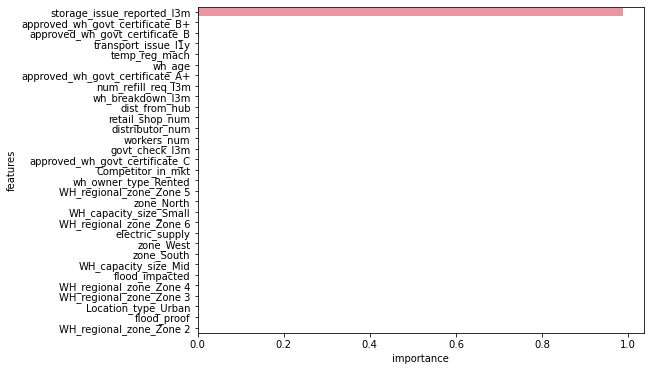

In [96]:
plt.figure(figsize=(8,6))
sns.barplot(y='features',x='importance',data=feature_rank)

Comparing the 2 models, we have obtained the best results using Random Forest regressor 
#### Linear regression 
* Linear regression is giving 82.2% accuracy in Train & 82.2% in Test with RMSE value of Train as 4897.35 & test as 4913.02
* The significant features are 'num_refill_req_l3m', 'transport_issue_l1y', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C'

#### Random Forest Regressor
* Random Forest regressor is giving 99.5% accuracy In Train & 99.4% in Test with RMSE value of Train as 791.35 & test as 893.26
* The significant feature for random forest is only 'storage_issue_reported_l3m'